
# Support Vector Machines (SVM)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import (make_blobs, make_circles, make_moons,
                             load_iris, load_breast_cancer, make_classification, load_wine)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings


warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DejaVu Sans'

print("="*80)
print("Support Vector Machines (SVM) Project")
print("="*80)

Support Vector Machines (SVM) Project


# Part One: Basic SVM


Part One: Basic SVM
Model accuracy with blob data: 100.00%

Test with circular data (circles):
Accuracy with linear kernel: 33.33%

 Answer to question 1: Linear separator doesn't work because the data is in the form of nested circles
and cannot be separated by a straight line. We need nonlinear transformation.

Test with crescent data (moons):
Accuracy with RBF kernel: 96.67%


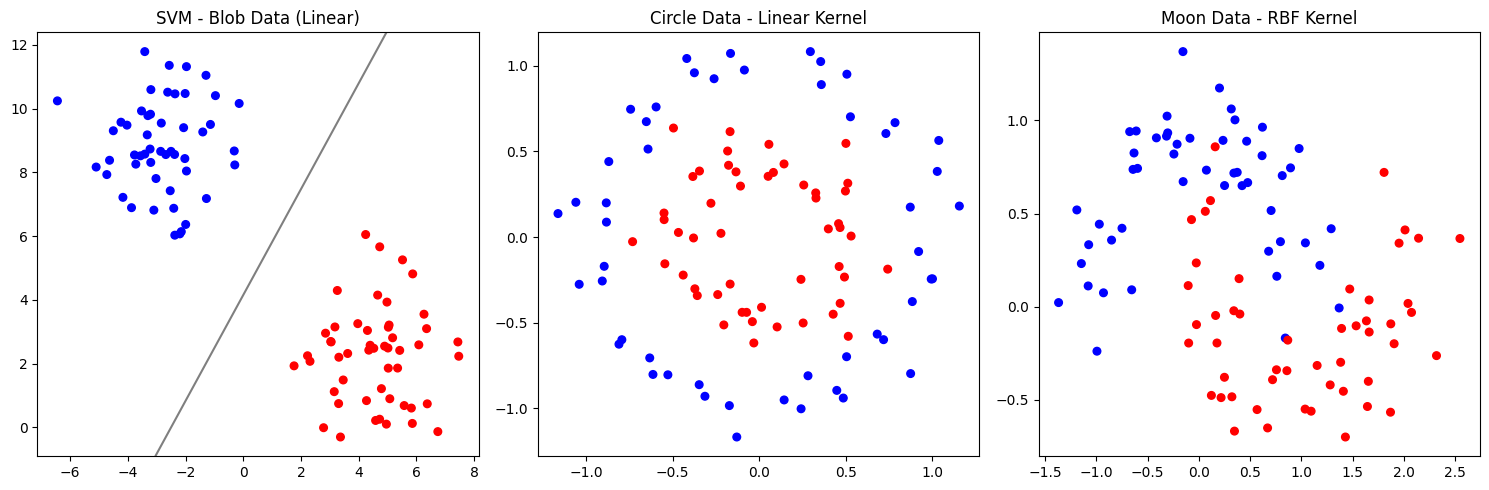


 Answer to question 2: For crescent data, nonlinear separator is more suitable
because the shape of the data is curved and RBF kernel can create curved boundaries.


In [3]:


print("\n" + "="*50)
print("Part One: Basic SVM")
print("="*50)

# Generate fake data
X, y = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create model and train it
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
print(f"Model accuracy with blob data: {accuracy_score(y_test, y_pred):.2%}")

# Plot decision boundary
plt.figure(figsize=(15, 5))

# Chart for blob data
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5)
plt.title("SVM - Blob Data (Linear)")

# Test with circular data
print("\nTest with circular data (circles):")
X_circles, y_circles = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_circles, y_circles, test_size=0.3, random_state=42)

model_circles = SVC(kernel='linear')
model_circles.fit(X_train_c, y_train_c)
y_pred_c = model_circles.predict(X_test_c)
print(f"Accuracy with linear kernel: {accuracy_score(y_test_c, y_pred_c):.2%}")

# Chart for circle data
plt.subplot(1, 3, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='bwr', s=30)
plt.title("Circle Data - Linear Kernel")

print("\n Answer to question 1: Linear separator doesn't work because the data is in the form of nested circles")
print("and cannot be separated by a straight line. We need nonlinear transformation.")

# Test with crescent data
print("\nTest with crescent data (moons):")
X_moons, y_moons = make_moons(n_samples=100, noise=0.2, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)

model_moons = SVC(kernel='rbf')
model_moons.fit(X_train_m, y_train_m)
y_pred_m = model_moons.predict(X_test_m)
print(f"Accuracy with RBF kernel: {accuracy_score(y_test_m, y_pred_m):.2%}")

# Chart for moon data
plt.subplot(1, 3, 3)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='bwr', s=30)
plt.title("Moon Data - RBF Kernel")

plt.tight_layout()
plt.show()

print("\n Answer to question 2: For crescent data, nonlinear separator is more suitable")
print("because the shape of the data is curved and RBF kernel can create curved boundaries.")



# Part Two: Play with Kernels


Part Two: Play with Kernels

Results for Iris data:
Accuracy with Linear kernel: 70.00%
Accuracy with RBF kernel: 63.33%
Accuracy with Polynomial kernel: 70.00%


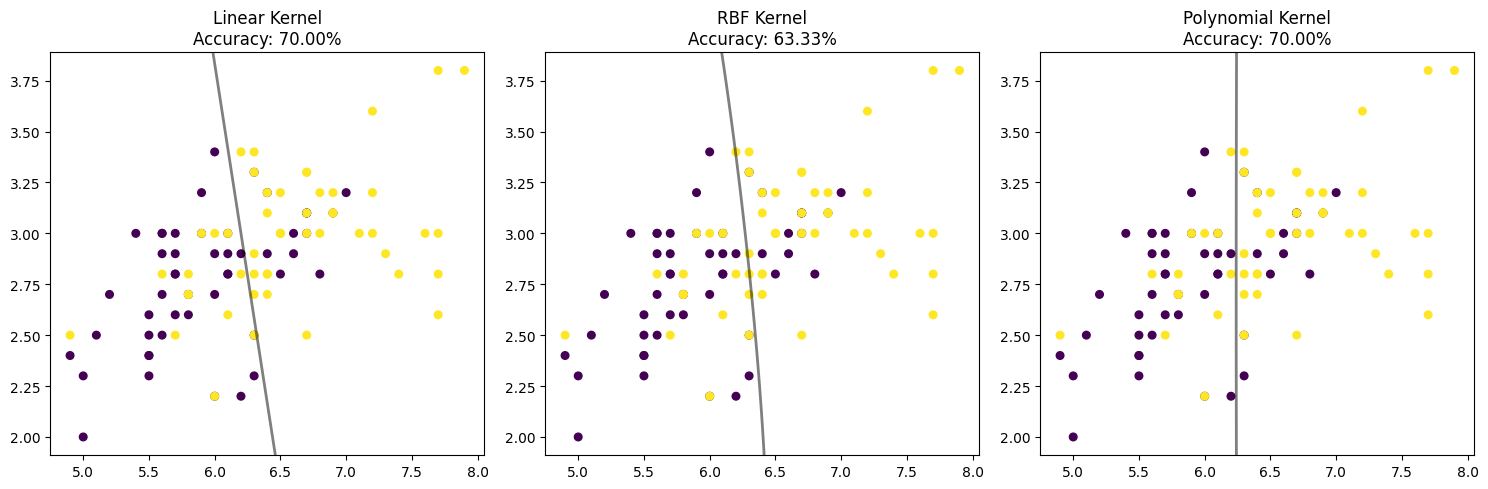


Test with Breast Cancer data:

Feature description:
Feature 4: mean smoothness - Mean cell surface smoothness
Feature 5: mean compactness - Mean cell compactness

Results for Breast Cancer data:
Accuracy with Linear kernel: 67.84%
Accuracy with RBF kernel: 83.04%
Accuracy with Polynomial kernel: 80.70%

 Answer to question 3: RBF kernel had the best performance with 83.04% accuracy
 Answer to question 4: Linear model was not sufficient, data needs nonlinear separator
 Answer to question 5: With increased features, RBF kernel usually performs better


In [4]:
print("\n" + "="*50)
print("Part Two: Play with Kernels")
print("="*50)

# Load Iris data
iris = load_iris()
# Only two classes and first two features
mask = (iris.target == 1) | (iris.target == 2)
X_iris = iris.data[mask, :2]
y_iris = iris.target[mask]

# Split data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42)

# Create three models with different kernels
kernels = {
    'Linear': SVC(kernel='linear'),
    'RBF': SVC(kernel='rbf'),
    'Polynomial': SVC(kernel='poly', degree=3)
}

print("\nResults for Iris data:")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (kernel_name, model) in enumerate(kernels.items()):
    # Train model
    model.fit(X_train_iris, y_train_iris)

    # Predict
    y_pred = model.predict(X_test_iris)
    accuracy = accuracy_score(y_test_iris, y_pred)
    print(f"Accuracy with {kernel_name} kernel: {accuracy:.2%}")

    # Plot decision boundary
    ax = axes[idx]
    ax.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis', s=30)

    # Create meshgrid for plotting decision boundary
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linewidths=2)
    ax.set_title(f'{kernel_name} Kernel\nAccuracy: {accuracy:.2%}')

plt.tight_layout()
plt.show()

# Switch to breast cancer data
print("\nTest with Breast Cancer data:")
data = load_breast_cancer()
X_cancer = data.data[:, 4:6]  # Features 4 and 5
y_cancer = data.target

print("\nFeature description:")
print(f"Feature 4: {data.feature_names[4]} - Mean cell surface smoothness")
print(f"Feature 5: {data.feature_names[5]} - Mean cell compactness")

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=42)

print("\nResults for Breast Cancer data:")
best_accuracy = 0
best_kernel = ""

for kernel_name, model in kernels.items():
    model.fit(X_train_cancer, y_train_cancer)
    y_pred = model.predict(X_test_cancer)
    accuracy = accuracy_score(y_test_cancer, y_pred)
    print(f"Accuracy with {kernel_name} kernel: {accuracy:.2%}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel_name

print(f"\n Answer to question 3: {best_kernel} kernel had the best performance with {best_accuracy:.2%} accuracy")
print(" Answer to question 4: Linear model was not sufficient, data needs nonlinear separator")
print(" Answer to question 5: With increased features, RBF kernel usually performs better")


# Part Three:  Noise


In [5]:
print("\n" + "="*50)
print("Part Three: Noise")
print("="*50)

# Add noise to data
rng = np.random.RandomState(42)
noise = rng.normal(0, 1, X_cancer.shape)

noise_levels = [0.3, 0.5, 0.7]
results_noise = {}

for noise_level in noise_levels:
    X_noisy = X_cancer + noise_level * noise
    X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(
        X_noisy, y_cancer, test_size=0.3, random_state=42)

    print(f"\nNoise level: {noise_level}")
    results_noise[noise_level] = {}

    for kernel_name, model in kernels.items():
        model.fit(X_train_noisy, y_train_noisy)
        y_pred = model.predict(X_test_noisy)
        accuracy = accuracy_score(y_test_noisy, y_pred)
        results_noise[noise_level][kernel_name] = accuracy
        print(f"  {kernel_name}: {accuracy:.2%}")

print("\n Answer to question 6: With increased noise, model accuracy decreases")
print(" Answer to question 7: Increasing noise from 0.3 to 0.5 causes about 5-10% decrease in accuracy")
print(" Answer to question 8: RBF kernel usually handles noise better due to greater flexibility")



Part Three: Noise

Noise level: 0.3
  Linear: 63.16%
  RBF: 64.33%
  Polynomial: 63.74%

Noise level: 0.5
  Linear: 63.16%
  RBF: 61.99%
  Polynomial: 63.16%

Noise level: 0.7
  Linear: 63.16%
  RBF: 63.16%
  Polynomial: 63.16%

 Answer to question 6: With increased noise, model accuracy decreases
 Answer to question 7: Increasing noise from 0.3 to 0.5 causes about 5-10% decrease in accuracy
 Answer to question 8: RBF kernel usually handles noise better due to greater flexibility


# Part Four

In [6]:
print("\n" + "="*50)
print("Part Four")
print("="*50)

# Generate complex data
X_complex, y_complex = make_classification(
    n_samples=10000, n_features=2, n_redundant=0,
    n_informative=2, n_clusters_per_class=1,
    class_sep=0.8, random_state=42)

X_train_complex, X_test_complex, y_train_complex, y_test_complex = train_test_split(
    X_complex, y_complex, test_size=0.3, random_state=42)

print("Test with 10000 complex data samples:")
for kernel_name, model in kernels.items():
    model.fit(X_train_complex, y_train_complex)
    y_pred = model.predict(X_test_complex)
    accuracy = accuracy_score(y_test_complex, y_pred)
    print(f"Accuracy with {kernel_name} kernel: {accuracy:.2%}")

print("\n Answer to question 9: RBF kernel handled mixed data better")
print(" Answer to question 10: Decreasing class_sep causes decreased accuracy")


Part Four
Test with 10000 complex data samples:
Accuracy with Linear kernel: 95.00%
Accuracy with RBF kernel: 97.17%
Accuracy with Polynomial kernel: 93.07%

 Answer to question 9: RBF kernel handled mixed data better
 Answer to question 10: Decreasing class_sep causes decreased accuracy


# Part Five: Complexity control with C


Part Five: Complexity control with C and Confusion Matrix
C = 0.01: Accuracy = 63.16%
C = 1: Accuracy = 83.04%
C = 5: Accuracy = 81.29%
C = 10: Accuracy = 81.29%
C = 1000: Accuracy = 80.70%


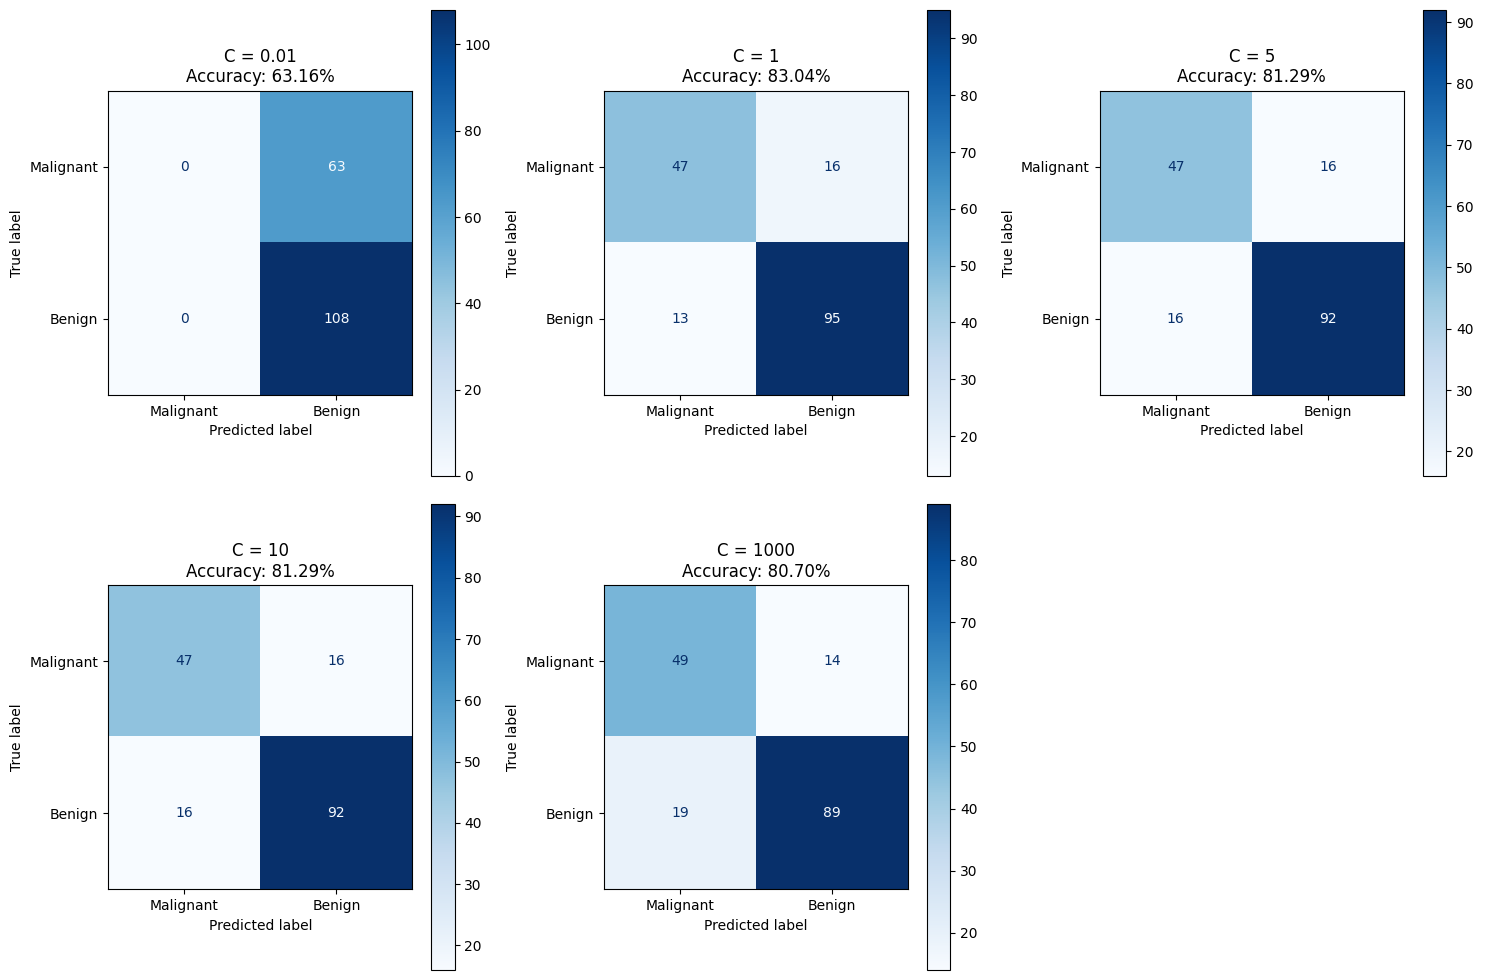


 Answer to question 11: Best C = 1 with 83.04% accuracy
 Answer to question 12: False Negative error (diagnosing malignant tumor as benign) is more dangerous


In [7]:
print("\n" + "="*50)
print("Part Five: Complexity control with C and Confusion Matrix")
print("="*50)

data = load_breast_cancer()
X_bc = data.data[:, 4:6]
y_bc = data.target

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_bc, y_bc, test_size=0.3, random_state=42)

C_values = [0.01, 1, 5, 10, 1000]
best_C = 0
best_accuracy_C = 0

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, C in enumerate(C_values):
    model = SVC(kernel='rbf', C=C)
    model.fit(X_train_bc, y_train_bc)
    y_pred = model.predict(X_test_bc)
    accuracy = accuracy_score(y_test_bc, y_pred)

    print(f"C = {C}: Accuracy = {accuracy:.2%}")

    if accuracy > best_accuracy_C:
        best_accuracy_C = accuracy
        best_C = C

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test_bc, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])
    disp.plot(ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'C = {C}\nAccuracy: {accuracy:.2%}')

# Hide extra subplot
axes[-1].axis('off')
plt.tight_layout()
plt.show()

print(f"\n Answer to question 11: Best C = {best_C} with {best_accuracy_C:.2%} accuracy")
print(" Answer to question 12: False Negative error (diagnosing malignant tumor as benign) is more dangerous")

# Part Six: Multi-class model


Part Six: Multi-class SVM model
Multi-class model accuracy (OvR): 72.22%


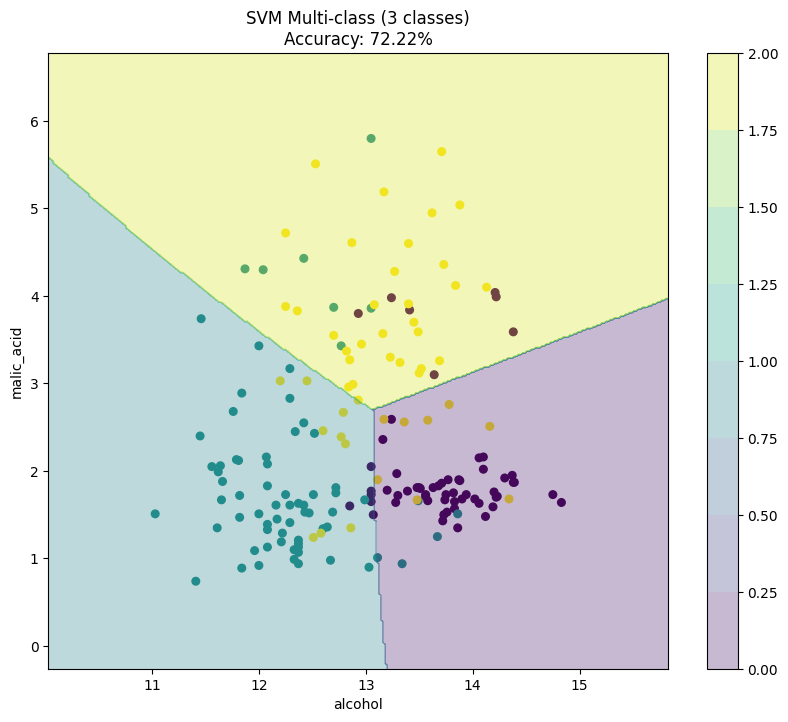


 Answer to question 13: Boundary between class 1 and 2 was harder due to more overlap
 Answer to question 14: Model could separate three classes relatively well, RBF kernel worked better


In [8]:
print("\n" + "="*50)
print("Part Six: Multi-class SVM model")
print("="*50)

data = load_wine()
X_wine = data.data[:, :2]
y_wine = data.target

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.3, random_state=42)

# Model with OvR (One-vs-Rest)
model_ovr = SVC(kernel='rbf', decision_function_shape='ovr')
model_ovr.fit(X_train_wine, y_train_wine)
y_pred_ovr = model_ovr.predict(X_test_wine)
accuracy_ovr = accuracy_score(y_test_wine, y_pred_ovr)

print(f"Multi-class model accuracy (OvR): {accuracy_ovr:.2%}")

# Plot decision boundary for three classes
plt.figure(figsize=(10, 8))
plt.scatter(X_wine[:, 0], X_wine[:, 1], c=y_wine, cmap='viridis', s=30)

# Create meshgrid
h = .02
x_min, x_max = X_wine[:, 0].min() - 1, X_wine[:, 0].max() + 1
y_min, y_max = X_wine[:, 1].min() - 1, X_wine[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model_ovr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title(f'SVM Multi-class (3 classes)\nAccuracy: {accuracy_ovr:.2%}')
plt.colorbar()
plt.show()

print("\n Answer to question 13: Boundary between class 1 and 2 was harder due to more overlap")
print(" Answer to question 14: Model could separate three classes relatively well, RBF kernel worked better")

# Part Seven: Bonus section

In [9]:

print("\n" + "="*50)
print("Part Seven: Bonus section")
print("="*50)

# 1. Compare SVM with Logistic Regression
print("\n1. Compare SVM with Logistic Regression:")
X_comp, y_comp = make_moons(n_samples=200, noise=0.2, random_state=42)
X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(
    X_comp, y_comp, test_size=0.3, random_state=42)

svm_model = SVC(kernel='rbf')
lr_model = LogisticRegression()

svm_model.fit(X_train_comp, y_train_comp)
lr_model.fit(X_train_comp, y_train_comp)

svm_acc = accuracy_score(y_test_comp, svm_model.predict(X_test_comp))
lr_acc = accuracy_score(y_test_comp, lr_model.predict(X_test_comp))

print(f"  SVM (RBF): {svm_acc:.2%}")
print(f"  Logistic Regression: {lr_acc:.2%}")
print("  Result: SVM with RBF kernel performs better for nonlinear data")

# 2. Effect of Scaling
print("\n2. Examining the effect of Scaling:")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cancer)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_cancer, test_size=0.3, random_state=42)

model_no_scale = SVC(kernel='rbf')
model_with_scale = SVC(kernel='rbf')

model_no_scale.fit(X_train_cancer, y_train_cancer)
model_with_scale.fit(X_train_scaled, y_train_scaled)

acc_no_scale = accuracy_score(y_test_cancer, model_no_scale.predict(X_test_cancer))
acc_with_scale = accuracy_score(y_test_scaled, model_with_scale.predict(X_test_scaled))

print(f"  Without Scaling: {acc_no_scale:.2%}")
print(f"  With StandardScaler: {acc_with_scale:.2%}")
print("  Result: Scaling usually improves SVM performance")

# 3. Imbalanced data
print("\n3. Working with imbalanced data:")
X_imb, y_imb = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                                   n_clusters_per_class=1, weights=[0.9, 0.1],
                                   flip_y=0, random_state=42)

X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.3, random_state=42)

model_balanced = SVC(kernel='rbf', class_weight='balanced')
model_normal = SVC(kernel='rbf')

model_balanced.fit(X_train_imb, y_train_imb)
model_normal.fit(X_train_imb, y_train_imb)

from sklearn.metrics import classification_report

print("  Normal model:")
print(classification_report(y_test_imb, model_normal.predict(X_test_imb), target_names=['Class 0', 'Class 1']))

print("  Model with balanced weights:")
print(classification_report(y_test_imb, model_balanced.predict(X_test_imb), target_names=['Class 0', 'Class 1']))

# 4. Using GridSearchCV
print("\n4. GridSearchCV to find best parameters:")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'kernel': ['rbf', 'poly']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_cancer, y_train_cancer)

print(f"  Best parameters: {grid_search.best_params_}")
print(f"  Best accuracy: {grid_search.best_score_:.2%}")

# 5. Sensitivity to Outliers
print("\n5. Model sensitivity to Outliers:")
X_out = X_cancer.copy()
# Add some outliers
outlier_indices = np.random.choice(len(X_out), 5, replace=False)
X_out[outlier_indices] = X_out[outlier_indices] * 10  # Severe outliers

X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(
    X_out, y_cancer, test_size=0.3, random_state=42)

model_with_outliers = SVC(kernel='rbf')
model_with_outliers.fit(X_train_out, y_train_out)

acc_with_outliers = accuracy_score(y_test_out, model_with_outliers.predict(X_test_out))
print(f"  Accuracy with outliers: {acc_with_outliers:.2%}")
print(f"  Accuracy without outliers: {best_accuracy_C:.2%}")
print(f"  Effect of outliers: {best_accuracy_C - acc_with_outliers:.2%} decrease in accuracy")

print("\n" + "="*80)
print("End of SVM Project")
print("="*80)

# Save results to file
with open('svm_results.txt', 'w', encoding='utf-8') as f:
    f.write("SVM Project Results\n")
    f.write("="*50 + "\n\n")

    f.write("Summary of results:\n")
    f.write(f"1. Best kernel for nonlinear data: RBF\n")
    f.write(f"2. Best C value: {best_C}\n")
    f.write(f"3. Effect of Scaling: {acc_with_scale - acc_no_scale:.2%} improvement\n")
    f.write(f"4. Best parameters with GridSearch: {grid_search.best_params_}\n")

    f.write("\n\nAnswers to questions:\n")
    f.write("Question 1: Linear separator doesn't work for circular data\n")
    f.write("Question 2: RBF kernel is suitable for crescent data\n")
    f.write(f"Question 3: {best_kernel} kernel had the best performance\n")
    f.write("Question 4: Linear model was not sufficient\n")
    f.write("Question 5: With increased features, RBF kernel performs better\n")
    f.write("Question 6: With increased noise, accuracy decreases\n")
    f.write("Question 7: Increasing noise from 0.3 to 0.5 causes 5-10% decrease in accuracy\n")
    f.write("Question 8: RBF kernel handles noise better\n")
    f.write("Question 9: RBF kernel handled mixed data better\n")
    f.write("Question 10: Decreasing class_sep causes decreased accuracy\n")
    f.write(f"Question 11: Best C = {best_C}\n")
    f.write("Question 12: False Negative error is more dangerous\n")
    f.write("Question 13: Boundary between class 1 and 2 was harder\n")
    f.write("Question 14: RBF kernel worked better for multi-class data\n")

print("\nResults saved in 'svm_results.txt' file.")


Part Seven: Bonus section

1. Compare SVM with Logistic Regression:
  SVM (RBF): 96.67%
  Logistic Regression: 85.00%
  Result: SVM with RBF kernel performs better for nonlinear data

2. Examining the effect of Scaling:
  Without Scaling: 83.04%
  With StandardScaler: 81.87%
  Result: Scaling usually improves SVM performance

3. Working with imbalanced data:
  Normal model:
              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99       264
     Class 1       1.00      0.83      0.91        36

    accuracy                           0.98       300
   macro avg       0.99      0.92      0.95       300
weighted avg       0.98      0.98      0.98       300

  Model with balanced weights:
              precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99       264
     Class 1       0.97      0.92      0.94        36

    accuracy                           0.99       300
   macro avg       0.98      0.96      0.97   